In [74]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Font error correction
import matplotlib as mpl

mpl.rcParams["font.family"] = "Malgun Gothic"  # Windows
# mpl.rcParams["font.family"] = "AppleGothic"  # MacOS
mpl.rcParams["axes.unicode_minus"] = False

In [75]:
df = pd.read_csv("../Desktop/study/mini_project/실습데이터.csv")
df.head()

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-


KeyError: '고객id'

In [76]:
for element in df.columns:
    print(element)

거래id
유형
고객id
코스ID
사이트
포맷
카테고리
코스(상품) 이름
거래일자
쿠폰이름
판매가격
결제수단
실거래금액
쿠폰할인액
거래금액
환불금액


In [77]:
df.dtypes

거래id          int64
유형           object
고객id          int64
코스ID          int64
사이트          object
포맷           object
카테고리         object
코스(상품) 이름    object
거래일자         object
쿠폰이름         object
판매가격         object
결제수단         object
실거래금액         int64
쿠폰할인액        object
거래금액         object
환불금액         object
dtype: object

In [78]:
df = df.rename(columns={"거래id": "거래ID", "고객id": "고객ID", "코스(상품) 이름": "코스이름"})
df.head()

,거래ID,유형,고객ID,코스ID,사이트,포맷,카테고리,코스이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-


In [79]:
# 항목별 0의 개수 확인
sell_columns_list = ["판매가격", "실거래금액", "쿠폰할인액", "거래금액", "환불금액"]

for i in sell_columns_list:
    print(f"{i}: {(df[i] == 0).sum()}")

판매가격: 0
실거래금액: 15203
쿠폰할인액: 0
거래금액: 0
환불금액: 0


In [80]:
# 항목별 "-"의 개수 확인
for i in sell_columns_list:
    print(f"{i}: {(df[i] == '-').sum()}")

판매가격: 59
실거래금액: 0
쿠폰할인액: 82946
거래금액: 11318
환불금액: 148010


In [81]:
# for label in sell_columns_list:
# print(df[df[label] == "-"][label])
# df[label].update(df[(df[label] == "-")][label], index=df[(df[label] == "-")][label].index)
# df.label[(df.label == "-")].values = pd.NA
df[sell_columns_list]

,판매가격,실거래금액,쿠폰할인액,거래금액,환불금액
0,189000,159000,-,159000,-
1,501000,501000,-,501000,-
2,549000,549000,-,549000,-
3,165000,135000,30000,135000,-
4,239000,239000,-,239000,-
...,...,...,...,...,...
159323,217000,207000,10000,207000,-
159324,385000,385000,-,385000,-
159325,166000,136000,30000,136000,-
159326,289000,289000,-,289000,-


In [82]:
df[(df["판매가격"] == "-")]["판매가격"].index
# df.판매가격[(df.판매가격 == "-")].values

Index([ 19439,  22208,  45226,  46113,  46114,  46115,  52873,  52876,  52877,
        52878,  52879,  52880,  58988,  58989,  59438,  59890,  62037,  65164,
        65879,  65880,  65885,  67787,  67798,  67799,  67800,  67801,  67802,
        78502,  78524,  83443,  83444,  83445,  83446,  83447,  83923,  92122,
        92198,  96168,  96584,  96752,  96843,  96844,  96845,  96846,  99575,
        99576,  99577,  99578, 106254, 106351, 108200, 116785, 129472, 129752,
       144949, 146106, 148704, 150010, 156596],
      dtype='int64')

In [83]:
# df.판매가격[(df.판매가격 == "-")].values
df[(df["판매가격"] == "-")]["판매가격"].values
df[sell_columns_list].columns

Index(['판매가격', '실거래금액', '쿠폰할인액', '거래금액', '환불금액'], dtype='object')

In [84]:
# pd.to_datetime(df.거래일자[0])

df_datetime = df.거래일자[0].replace(" ", "").split(".")
df_datetime

['2022', '12', '31', '오후10:12:33']

In [85]:
df["년도"] = df_datetime[0]
df_new_col = ["년도", "월", "일", "시간"]

i = 0

for col in df_new_col:
    df[col] = df_datetime[i]
    i += 1

In [86]:
df.columns

Index(['거래ID', '유형', '고객ID', '코스ID', '사이트', '포맷', '카테고리', '코스이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액', '년도', '월',
       '일', '시간'],
      dtype='object')

In [87]:
# df.시간[0].replace("오후", "PM")
df["datetime"] = df.시간.str.replace("오후", "PM").str.replace("오전", "AM")

In [88]:
df.datetime

0         PM10:12:33
1         PM10:12:33
2         PM10:12:33
3         PM10:12:33
4         PM10:12:33
             ...    
159323    PM10:12:33
159324    PM10:12:33
159325    PM10:12:33
159326    PM10:12:33
159327    PM10:12:33
Name: datetime, Length: 159328, dtype: object

In [89]:
df['거래일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 159328 entries, 0 to 159327
Series name: 거래일자
Non-Null Count   Dtype 
--------------   ----- 
159328 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [113]:
from datetime import datetime


df['거래일자'] = df['거래일자'].str.replace('오후', 'PM')
df['거래일자'] = df['거래일자'].str.replace('오전', 'AM')

df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S')

df['년도'] = df['거래일자'].dt.year
df['월'] = df['거래일자'].dt.month
df['일'] = df['거래일자'].dt.day
df['시'] = df['거래일자'].dt.hour

In [114]:
df['년도'] = df['거래일자'].dt.year
df['월'] = df['거래일자'].dt.month
df['일'] = df['거래일자'].dt.day
df['시'] = df['거래일자'].dt.hour

In [118]:
df.drop(columns='년도',inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   거래ID    159328 non-null  int64         
 1   코스ID    159328 non-null  int64         
 2   카테고리    159328 non-null  object        
 3   코스이름    159328 non-null  object        
 4   거래일자    159328 non-null  datetime64[ns]
 5   판매가격    159328 non-null  object        
 6   환불금액    159328 non-null  object        
 7   월       159328 non-null  int32         
 8   일       159328 non-null  int32         
 9   시       159328 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(4)
memory usage: 10.3+ MB


In [134]:
df['판매가격'].replace('-', '0')

0         189000.0
1         501000.0
2         549000.0
3         165000.0
4         239000.0
            ...   
159323    217000.0
159324    385000.0
159325    166000.0
159326    289000.0
159327    370000.0
Name: 판매가격, Length: 159328, dtype: float64

In [135]:
df['판매가격']

0         189000.0
1         501000.0
2         549000.0
3         165000.0
4         239000.0
            ...   
159323    217000.0
159324    385000.0
159325    166000.0
159326    289000.0
159327    370000.0
Name: 판매가격, Length: 159328, dtype: float64

In [169]:
df_month_sum = df.groupby('월')['판매가격'].sum()
df_hour_sum = df.groupby('시')['판매가격'].sum()

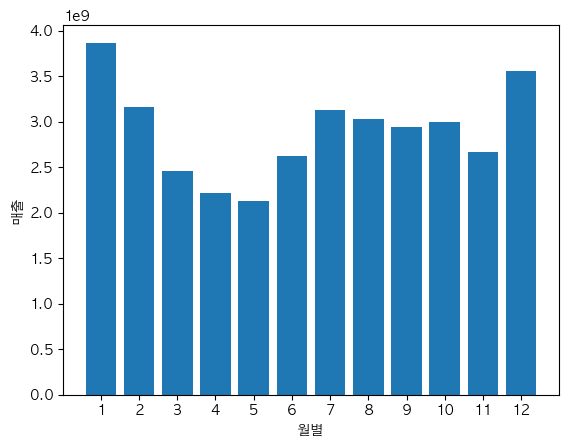

In [177]:
plt.bar(df_month_sum.index, df_month_sum)
plt.xlabel('월별')
plt.ylabel('매출')
plt.xticks(range(1, 13), labels=range(1, 13))
plt.show()

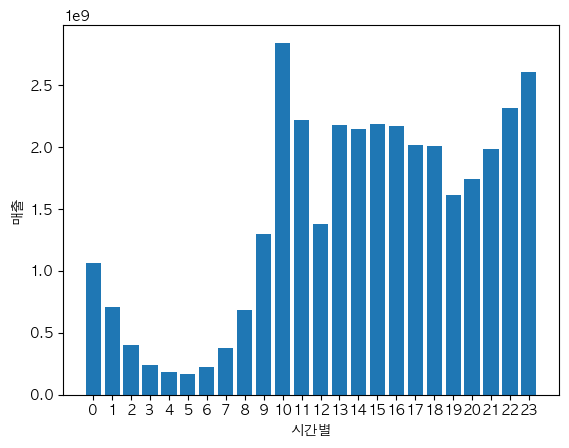

In [173]:
plt.bar(df_hour_sum.index, df_hour_sum)
plt.xlabel('시간별')
plt.ylabel('매출')
plt.xticks(range(0, 24), labels=range(0, 24))
plt.show()

In [178]:
df

,거래ID,코스ID,카테고리,코스이름,거래일자,판매가격,환불금액,월,일,시
0,2417084,209016,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,189000.0,-,12,31,22
1,2415408,210664,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,501000.0,-,12,30,18
2,2413897,211782,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,549000.0,-,12,31,23
3,2413891,213450,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,165000.0,-,12,31,23
4,2413887,210773,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,239000.0,-,12,31,23
...,...,...,...,...,...,...,...,...,...,...
159323,1551424,204491,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,217000.0,-,1,1,0
159324,1551410,206811,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,385000.0,-,1,1,0
159325,1551361,202927,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,166000.0,-,1,1,0
159326,1545070,208104,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,289000.0,-,1,2,11


In [217]:
df_cat1 = df[df['카테고리'] == '업무 생산성']
df_cat1

,거래ID,코스ID,카테고리,코스이름,거래일자,판매가격,환불금액,월,일,시
0,2417084,209016,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,189000.0,-,12,31,22
8,2413872,214298,업무 생산성,올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터,2022-12-31 23:12:01,130000.0,-,12,31,23
19,2413827,203530,업무 생산성,초격차 패키지 : 한 번에 끝내는 반복 업무 자동화,2022-12-31 23:12:09,159000.0,-,12,31,23
29,2413797,210569,업무 생산성,올인원 패키지 : 문서의 신이 알려주는 보고서의 법칙 : 비즈니스 글쓰기의 모든 것,2022-12-31 23:12:32,166000.0,-,12,31,23
39,2413764,204373,업무 생산성,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2022-12-31 23:12:07,168000.0,-,12,31,23
...,...,...,...,...,...,...,...,...,...,...
159236,1551899,203534,업무 생산성,올인원 패키지 : 엑셀언니의 사무실용 엑셀뿌수기,2022-01-01 15:01:53,103000.0,-,1,1,15
159245,1551863,203499,업무 생산성,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,2022-01-01 15:01:54,161000.0,-,1,1,15
159254,1551835,203498,업무 생산성,초격차 패키지 : 한 번에 끝내는 엑셀 실무,2022-01-01 14:01:27,139000.0,-,1,1,14
159298,1551629,205569,업무 생산성,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,2022-01-01 07:01:17,151000.0,-,1,1,7


In [234]:
df_cat1_money = df_cat1.groupby('코스이름')['판매가격'].sum().sort_values(ascending=False).reset_index()
df_cat1_money['매출점수'] = list(range(10, 0, -1)) + [0] * (len(df_cat1_money)-10)
df_cat1_money

,코스이름,판매가격,매출점수
0,초격차 패키지 : 일잘러 필수 스킬 모음.zip,464263000.0,10
1,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,166445000.0,9
2,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,151196000.0,8
3,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,135759000.0,7
4,초격차 패키지: 한 번에 끝내는 비즈니스 영어,135128500.0,6
5,올인원 패키지 : 문서의 신이 알려주는 보고서의 법칙 : 비즈니스 글쓰기의 모든 것,133273000.0,5
6,The RED : YouTube 프로덕트 매니저 다니엘의 PM 101,123275000.0,4
7,초격차 패키지 : 직장인이 진짜 필요한 업무자동화 SUPER팩,121029000.0,3
8,초격차 패키지 : 한 번에 끝내는 엑셀 실무,115972500.0,2
9,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,102416000.0,1


In [231]:
df_cat1_people = df_cat1.groupby('코스이름')['거래ID'].size().sort_values(ascending=False).reset_index()
df_cat1_people['빈도점수'] = list(range(10, 0, -1)) + [0] * (len(df_cat1_people)-10)
df_cat1_people

,코스이름,거래ID,빈도점수
0,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2890,10
1,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,1062,9
2,올인원 패키지 : 문서의 신이 알려주는 보고서의 법칙 : 비즈니스 글쓰기의 모든 것,830,8
3,초격차 패키지 : 한 번에 끝내는 엑셀 실무,806,7
4,초격차 패키지: 한 번에 끝내는 비즈니스 영어,732,6
5,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,714,5
6,초격차 패키지 : 직장인이 진짜 필요한 업무자동화 SUPER팩,694,4
7,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,683,3
8,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,674,2
9,The RED : YouTube 프로덕트 매니저 다니엘의 PM 101,570,1


In [235]:
df_cat1_score = pd.merge(df_cat1_people, df_cat1_money)
df_cat1_score

,코스이름,거래ID,빈도점수,판매가격,매출점수
0,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2890,10,464263000.0,10
1,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,1062,9,166445000.0,9
2,올인원 패키지 : 문서의 신이 알려주는 보고서의 법칙 : 비즈니스 글쓰기의 모든 것,830,8,133273000.0,5
3,초격차 패키지 : 한 번에 끝내는 엑셀 실무,806,7,115972500.0,2
4,초격차 패키지: 한 번에 끝내는 비즈니스 영어,732,6,135128500.0,6
5,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,714,5,151196000.0,8
6,초격차 패키지 : 직장인이 진짜 필요한 업무자동화 SUPER팩,694,4,121029000.0,3
7,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,683,3,102416000.0,1
8,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,674,2,135759000.0,7
9,The RED : YouTube 프로덕트 매니저 다니엘의 PM 101,570,1,123275000.0,4


In [236]:
df_cat1_score['총점수'] = df_cat1_score['빈도점수'] + df_cat1_score['매출점수']
df_cat1_score.head(10)

,코스이름,거래ID,빈도점수,판매가격,매출점수,총점수
0,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2890,10,464263000.0,10,20
1,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,1062,9,166445000.0,9,18
2,올인원 패키지 : 문서의 신이 알려주는 보고서의 법칙 : 비즈니스 글쓰기의 모든 것,830,8,133273000.0,5,13
3,초격차 패키지 : 한 번에 끝내는 엑셀 실무,806,7,115972500.0,2,9
4,초격차 패키지: 한 번에 끝내는 비즈니스 영어,732,6,135128500.0,6,12
5,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,714,5,151196000.0,8,13
6,초격차 패키지 : 직장인이 진짜 필요한 업무자동화 SUPER팩,694,4,121029000.0,3,7
7,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,683,3,102416000.0,1,4
8,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,674,2,135759000.0,7,9
9,The RED : YouTube 프로덕트 매니저 다니엘의 PM 101,570,1,123275000.0,4,5


In [233]:
df_cat1

,거래ID,코스ID,카테고리,코스이름,거래일자,판매가격,환불금액,월,일,시
0,2417084,209016,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,189000.0,-,12,31,22
8,2413872,214298,업무 생산성,올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터,2022-12-31 23:12:01,130000.0,-,12,31,23
19,2413827,203530,업무 생산성,초격차 패키지 : 한 번에 끝내는 반복 업무 자동화,2022-12-31 23:12:09,159000.0,-,12,31,23
29,2413797,210569,업무 생산성,올인원 패키지 : 문서의 신이 알려주는 보고서의 법칙 : 비즈니스 글쓰기의 모든 것,2022-12-31 23:12:32,166000.0,-,12,31,23
39,2413764,204373,업무 생산성,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2022-12-31 23:12:07,168000.0,-,12,31,23
...,...,...,...,...,...,...,...,...,...,...
159236,1551899,203534,업무 생산성,올인원 패키지 : 엑셀언니의 사무실용 엑셀뿌수기,2022-01-01 15:01:53,103000.0,-,1,1,15
159245,1551863,203499,업무 생산성,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,2022-01-01 15:01:54,161000.0,-,1,1,15
159254,1551835,203498,업무 생산성,초격차 패키지 : 한 번에 끝내는 엑셀 실무,2022-01-01 14:01:27,139000.0,-,1,1,14
159298,1551629,205569,업무 생산성,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,2022-01-01 07:01:17,151000.0,-,1,1,7


In [239]:


#매출 = 실가격 + 환불금액

,거래ID,코스ID,카테고리,코스이름,거래일자,판매가격,환불금액,월,일,시
0,2417084,209016,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,189000.0,-,12,31,22
1,2415408,210664,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,501000.0,-,12,30,18
2,2413897,211782,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,549000.0,-,12,31,23
3,2413891,213450,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,165000.0,-,12,31,23
4,2413887,210773,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,239000.0,-,12,31,23
...,...,...,...,...,...,...,...,...,...,...
159323,1551424,204491,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,217000.0,-,1,1,0
159324,1551410,206811,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,385000.0,-,1,1,0
159325,1551361,202927,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,166000.0,-,1,1,0
159326,1545070,208104,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,289000.0,-,1,2,11


In [254]:
df[df['환불금액'] == '0']

,거래ID,코스ID,카테고리,코스이름,거래일자,판매가격,환불금액,월,일,시
1248,2406093,214833,일러스트,네오아카데미 : 후와리의 스토리가 느껴지는 라이트 노벨 일러스트,2022-12-30 11:12:55,250000.0,0,12,30,11
1310,2405724,214834,일러스트,네오아카데미: 오카즈의 판타지 세계관 게임 캐릭터 디자인,2022-12-30 10:12:05,220000.0,0,12,30,10
1327,2405582,212598,일러스트,네오아카데미 : 설의 매트페인팅으로 만드는 감성적인 캐주얼 일러스트,2022-12-30 09:12:53,281000.0,0,12,30,9
5091,2375879,211368,프로그래밍,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),2022-12-22 13:12:48,201000.0,0,12,22,13
6774,2364490,211867,데이터 사이언스,초격차 패키지 : 33개 프로젝트로 완성하는 컴퓨터비전 딥러닝 심화 과정,2022-12-19 15:12:09,328000.0,0,12,19,15
...,...,...,...,...,...,...,...,...,...,...
146970,1600625,207556,영상/3D,올인원 패키지 : Unity를 활용한 영화 애니메이션 제작,2022-01-17 18:01:52,172000.0,0,1,17,18
146971,1600624,202609,프로그래밍,올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작,2022-01-17 18:01:52,162000.0,0,1,17,18
149973,1585957,202521,영상/3D,올인원 패키지 : 다빈치리졸브로 배우는 영상 색 보정 A to Z,2022-01-11 11:01:00,154000.0,0,1,11,11
150361,1583488,203173,업무 생산성,올인원 패키지 : 자유자재로 쓰는 태블로 대시보드 마스터,2022-01-10 17:01:00,165000.0,0,1,10,17
